In [57]:
import pandas as pd
import numpy as np


In [58]:
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv.xls')
df = df.sample(len(df) , random_state=2)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
414,LP002335,Female,Yes,0,Not Graduate,No,2149,3237.0,178.0,360.0,0.0,Semiurban,N
569,LP002841,Male,Yes,0,Graduate,No,3166,2064.0,104.0,360.0,0.0,Urban,N
265,LP001875,Male,No,0,Graduate,No,4095,3447.0,151.0,360.0,1.0,Rural,Y
84,LP001275,Male,Yes,1,Graduate,No,3988,0.0,50.0,240.0,1.0,Urban,Y
109,LP001384,Male,Yes,3+,Not Graduate,No,2071,754.0,94.0,480.0,1.0,Semiurban,Y


In [59]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [61]:
columns = ['Gender', 'Married', 'Dependents',
       'Self_Employed', 'Credit_History']
for i in columns:
  print(df[i].value_counts() , '\n')

Gender
Male      489
Female    112
Name: count, dtype: int64 

Married
Yes    398
No     213
Name: count, dtype: int64 

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64 

Self_Employed
No     500
Yes     82
Name: count, dtype: int64 

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64 



In [62]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [63]:
df['LoanAmount'] = df['LoanAmount'].replace(np.nan , df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(np.nan , df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].replace(np.nan , 1)

In [64]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
df.shape

(614, 13)

In [66]:
df = df.dropna(how='any')

In [67]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [68]:
df.shape

(554, 13)

In [69]:
df = df.replace({'Loan_Status' : {'N' : 0 , 'Y': 1}})

In [70]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
414,LP002335,Female,Yes,0,Not Graduate,No,2149,3237.0,178.0,360.0,0.0,Semiurban,0
569,LP002841,Male,Yes,0,Graduate,No,3166,2064.0,104.0,360.0,0.0,Urban,0
265,LP001875,Male,No,0,Graduate,No,4095,3447.0,151.0,360.0,1.0,Rural,1
84,LP001275,Male,Yes,1,Graduate,No,3988,0.0,50.0,240.0,1.0,Urban,1
109,LP001384,Male,Yes,3+,Not Graduate,No,2071,754.0,94.0,480.0,1.0,Semiurban,1


In [71]:
df = df.replace(to_replace='3+', value=4)

In [72]:
df['Dependents'].value_counts

<bound method IndexOpsMixin.value_counts of 414    0
569    0
265    0
84     1
109    4
      ..
534    0
584    1
493    0
527    1
168    0
Name: Dependents, Length: 554, dtype: object>

DATA VISUALISATION

In [73]:
import seaborn as sns

<Axes: xlabel='Education', ylabel='count'>

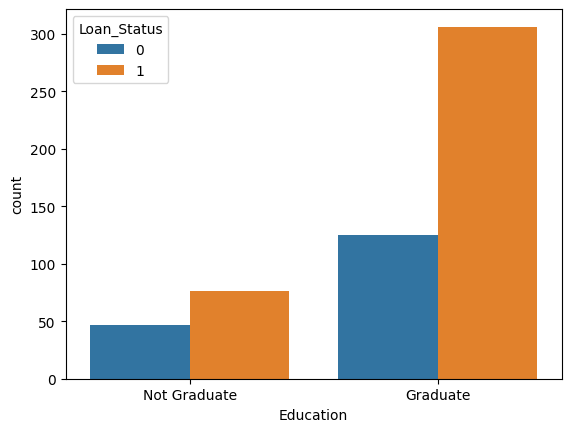

In [74]:
sns.countplot(x='Education' , hue='Loan_Status' , data=df)


<Axes: xlabel='Married', ylabel='count'>

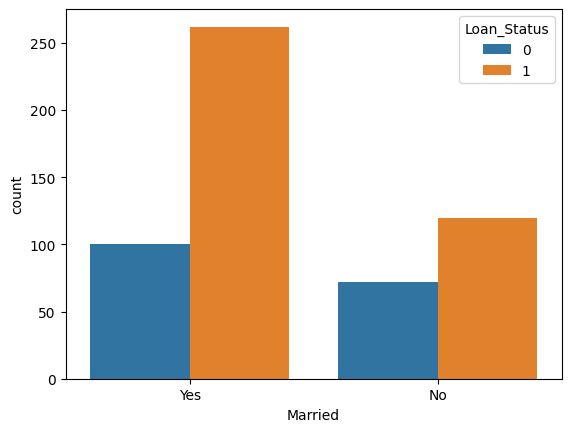

In [75]:
sns.countplot(x='Married' , hue='Loan_Status' , data=df)


<Axes: xlabel='Gender', ylabel='count'>

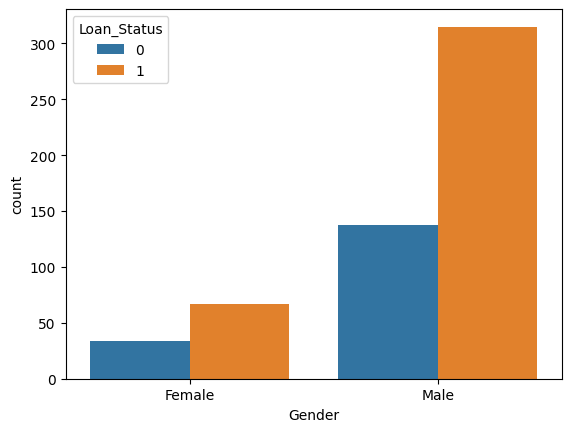

In [76]:
sns.countplot(x='Gender' , hue='Loan_Status' , data=df)


In [77]:
df = df.replace({'Gender' : {'Male' : 1 , 'Female': 0}})
df = df.replace({'Married' : {'Yes' : 1 , 'No': 0}})
df = df.replace({'Self_Employed' : {'Yes' : 1 , 'No': 0}})
df = df.replace({'Property_Area' : {'Urban' : 2 , 'Rural': 0 , 'Semiurban':1}})
df = df.replace({'Education' : {'Graduate' : 1 , 'Not Graduate': 0}})

In [78]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
414,LP002335,0,1,0,0,0,2149,3237.0,178.0,360.0,0.0,1,0
569,LP002841,1,1,0,1,0,3166,2064.0,104.0,360.0,0.0,2,0
265,LP001875,1,0,0,1,0,4095,3447.0,151.0,360.0,1.0,0,1
84,LP001275,1,1,1,1,0,3988,0.0,50.0,240.0,1.0,2,1
109,LP001384,1,1,4,0,0,2071,754.0,94.0,480.0,1.0,1,1


In [79]:
x = df.drop(['Loan_Status','Loan_ID'] , axis=1)
y = df['Loan_Status']

In [80]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [81]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(554, 11)
(443, 11)
(111, 11)


Tranning Model:

Support Vector Machine Model

In [82]:
from sklearn import svm

In [83]:
classifier = svm.SVC(kernel = 'linear')

In [84]:
# training the SVM:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [85]:
x_train_pred = classifier.predict(x_train)

In [86]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(x_train_pred , y_train)
print(f"Model Accuary is {acc}")

Model Accuary is 0.7900677200902935


Checking for test data

In [87]:
# training the SVM:
classifier.fit(x_test,y_test)

SVC(kernel='linear')

In [88]:
x_test_pred = classifier.predict(x_test)

In [89]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(x_test_pred , y_test)
print(f"Model Accuary is {acc_train}")

Model Accuary is 0.7747747747747747


NOW CHECKING WITH LOGISTIC REGRESSION

In [90]:
from sklearn.linear_model import LogisticRegression
lr  = LogisticRegression()

In [91]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
lr_pred = lr.predict(x_train)

In [93]:
acc_lr_train = accuracy_score(lr_pred , y_train)
print(f"Model Accuary is {acc_lr_train}")

Model Accuary is 0.8081264108352144


In [94]:
lr.fit(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
lr_pred_test = lr.predict(x_test)

In [96]:
acc_lr_test = accuracy_score(lr_pred_test , y_test)
print(f"Model Accuary is {acc_lr_test}")

Model Accuary is 0.8288288288288288
